In [1]:
from matplotlib import pyplot as plt
from nbmetalog import nbmetalog as nbm
import numpy as np
import pandas as pd
import seaborn as sns
from teeplot import teeplot as tp

import pylib


In [2]:
nbm.print_metadata()


context: local
hostname: thinkpad
interpreter: 3.10.6 (main, Mar 10 2023, 10:55:28) [GCC 11.3.0]
nbcellexec: null
nbname: Ne-inference-stats
nbpath: /home/mmore500/2023-05-22/hstrat-recomb-concept/notebooks/Ne-inference-stats.ipynb
revision: null
session: f3ca0bb3-bd21-4c89-86f9-d828c72f4d53
timestamp: 2023-05-24T02:17:39Z00:00


IPython==7.31.1
keyname==0.5.2
yaml==6.0
matplotlib==3.6.2
nbmetalog==0.2.6
numpy==1.23.5
pandas==1.5.2
seaborn==0.12.1
teeplot==0.5.0
re==2.2.1
debugpy==1.6.6
logging==0.5.1.2
psutil==5.9.0
zmq==22.3.0
json==2.0.9
ipykernel==6.7.0


In [3]:
df = pylib.util.concat_dataframes_from_glob(
    "a=snapshot-comparisons-stats+*+ext=.csv"
)


In [4]:
df


,Unnamed: 0,notebook,replicate,treatment,first rank,population size estimate at first rank,population size upper bound at first rank,population size lower bound at first rank,second rank,population size estimate at second rank,population size upper bound at second rank,population size lower bound at second rank,nonoverlapping CI,Mann-Whitney p,Mann-Whitney significant at alpha = 0.05,Mann-Whitney significant at alpha = 0.01
0,0,ne-inference,2,bottleneck,33,33.276279,56.851868,15.957269,100,4.223165,7.215195,2.025172,True,6.020579e-09,True,True
1,1,ne-inference,2,bottleneck,33,33.276279,56.851868,15.957269,166,65.188613,111.373464,31.260474,False,6.408298e-01,False,False
2,2,ne-inference,2,bottleneck,100,4.223165,7.215195,2.025172,33,33.276279,56.851868,15.957269,True,6.020579e-09,True,True
3,3,ne-inference,2,bottleneck,100,4.223165,7.215195,2.025172,166,65.188613,111.373464,31.260474,True,3.431624e-09,True,True
4,4,ne-inference,2,bottleneck,166,65.188613,111.373464,31.260474,33,33.276279,56.851868,15.957269,False,6.408298e-01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1,ne-inference,8,selection-pressure,33,19.633223,33.542975,9.414893,166,15.067614,25.742723,7.225507,False,7.205829e-01,False,False
236,2,ne-inference,8,selection-pressure,100,65.276592,111.523774,31.302663,33,19.633223,33.542975,9.414893,False,4.428786e-03,True,True
237,3,ne-inference,8,selection-pressure,100,65.276592,111.523774,31.302663,166,15.067614,25.742723,7.225507,True,5.779386e-02,False,False
238,4,ne-inference,8,selection-pressure,166,15.067614,25.742723,7.225507,33,19.633223,33.542975,9.414893,False,7.205829e-01,False,False


teeplots/./hue=generation+viz=boxplot-popsize+x=treatment+y=population-size-estimate+ext=.pdf
teeplots/./hue=generation+viz=boxplot-popsize+x=treatment+y=population-size-estimate+ext=.png


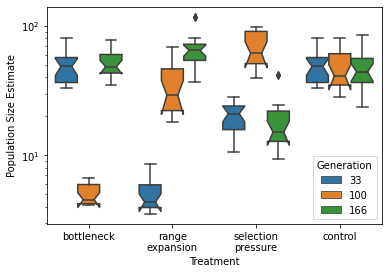

In [5]:
df["Generation"] = df["first rank"]
df["Population Size Estimate"] = df["population size estimate at first rank"]
df["Treatment"] = df["treatment"].str.replace("-", "\n")


def boxplot_popsize(data, x, y, hue):
    sns.boxplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        notch=True,
    )
    plt.yscale("log")


tp.tee(
    boxplot_popsize,
    data=df,
    x="Treatment",
    y="Population Size Estimate",
    hue="Generation",
)


teeplots/./hue=mann-whitney-significant-at-alpha-0-01+viz=facet-heatmap+x=generation-b+y=generation-a+ext=.pdf
teeplots/./hue=mann-whitney-significant-at-alpha-0-01+viz=facet-heatmap+x=generation-b+y=generation-a+ext=.png


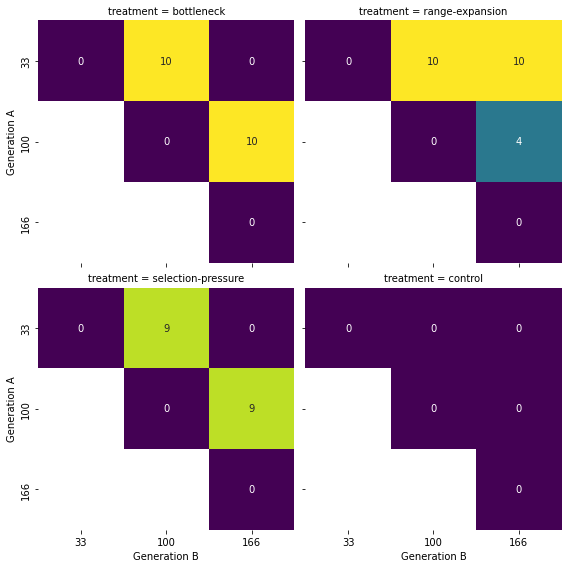

In [6]:
df["Generation A"] = df["first rank"]
df["Generation B"] = df["second rank"]


def plot_heatmap(data, x, y, hue, **kwargs):
    pivoted_data = (
        data[data[hue]]
        .pivot_table(index=x, columns=y, aggfunc="size", fill_value=0)
        .astype(int)
    )
    if len(pivoted_data) == 0:
        pivoted_data = data.pivot_table(
            index=x, columns=y, aggfunc="size", fill_value=0
        ).astype(int)
        pivoted_data[:] = 0

    sns.heatmap(
        pivoted_data,
        xticklabels=True,
        yticklabels=True,
        vmin=0,
        vmax=10,
        mask=np.tril(np.ones_like(pivoted_data.values, dtype=bool), -1),
        annot=True,
        fmt="d",
        cmap="viridis",
        cbar=False,
        **kwargs
    )


def facet_heatmap(data, x, y, hue):
    g = sns.FacetGrid(data, col="treatment", col_wrap=2, height=4, aspect=1)
    g.map_dataframe(plot_heatmap, x=x, y=y, hue=hue)


tp.tee(
    facet_heatmap,
    data=df,
    x="Generation B",
    y="Generation A",
    hue="Mann-Whitney significant at alpha = 0.01",
)


teeplots/./hue=nonoverlapping-ci+viz=facet-heatmap+x=generation-b+y=generation-a+ext=.pdf
teeplots/./hue=nonoverlapping-ci+viz=facet-heatmap+x=generation-b+y=generation-a+ext=.png


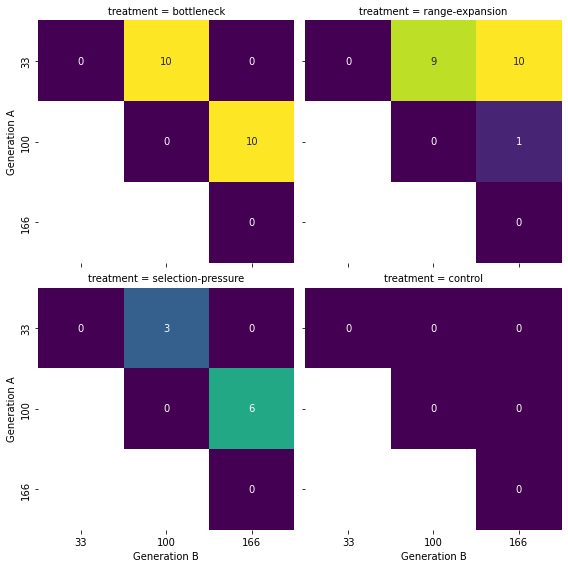

In [7]:
tp.tee(
    facet_heatmap,
    data=df,
    x="Generation B",
    y="Generation A",
    hue="nonoverlapping CI",
)
